In [131]:
import requests
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [132]:
url = "https://api.schiphol.nl/public-flights/flights?includedelays=false&page=0&sort=%2BscheduleTime"
headers = {
    "app_id": "c93492b2",
    "app_key": "16a5764ed747d28fc0c58196e7322a04",
    'ResourceVersion': 'v4'
}

response = requests.get(url, headers=headers)
data = response.json()  # Get the response as a JSON object

# Extract the 'flights' list from the response
flights_data = data.get('flights', [])

# Normalize the 'flights' list into a DataFrame
df = pd.json_normalize(flights_data)

# Display the first few rows of the DataFrame
df.head()

,lastUpdatedAt,actualLandingTime,aircraftRegistration,estimatedLandingTime,expectedTimeOnBelt,flightDirection,flightName,flightNumber,gate,pier,id,isOperationalFlight,mainFlight,prefixIATA,prefixICAO,airlineCode,scheduleDateTime,scheduleDate,scheduleTime,serviceType,terminal,schemaVersion,aircraftType.iataMain,aircraftType.iataSub,baggageClaim.belts,codeshares.codeshares,publicFlightState.flightStates,route.destinations,route.eu,route.visa,actualOffBlockTime,expectedSecurityFilter,checkinAllocations.checkinAllocations
0,2025-03-27T01:39:47.186+01:00,2025-03-27T00:00:00.000+01:00,PHHXA,2025-03-26T23:59:52.000+01:00,2025-03-27T00:36:39.000+01:00,A,HV6888,6888,D61,D,142009545517434014,True,HV6888,HV,TRA,164.0,2025-03-27T00:15:00.000+01:00,2025-03-27,00:15:00,J,1.0,4,737,73H,[2],[KL2746],"[ARR, EXP]",[KEF],S,False,NaN,NaN,NaN
1,2025-03-27T01:39:47.186+01:00,2025-03-27T00:00:00.000+01:00,PHHXA,2025-03-26T23:59:52.000+01:00,2025-03-27T00:36:39.000+01:00,A,KL2746,2746,D61,D,142009545895606274,True,HV6888,KL,KLM,100.0,2025-03-27T00:15:00.000+01:00,2025-03-27,00:15:00,J,1.0,4,737,73H,[2],[KL2746],"[ARR, EXP]",[KEF],S,False,NaN,NaN,NaN
2,2024-10-16T15:17:08.055+02:00,NaN,NaN,NaN,NaN,A,HV6904,6904,NaN,NaN,142009545517436152,False,HV6904,HV,NaN,NaN,2025-03-27T00:35:00.000+01:00,2025-03-27,00:35:00,J,NaN,4,73H,73H,NaN,NaN,[SCH],"[DXB, ATH]",N,False,NaN,NaN,NaN
3,2024-08-22T10:46:58.889+02:00,NaN,NaN,NaN,NaN,A,HV6308,6308,NaN,NaN,142009545517419732,False,HV6308,HV,NaN,NaN,2025-03-27T00:45:00.000+01:00,2025-03-27,00:45:00,J,NaN,4,32S,32Q,NaN,NaN,[SCH],[BEY],N,False,NaN,NaN,NaN
4,2025-03-27T05:39:39.790+01:00,2025-03-27T05:21:36.000+01:00,JA13KZ,2025-03-27T05:22:03.000+01:00,NaN,A,KZ004,4,NaN,NaN,142009544365967514,True,KZ004,KZ,NCA,131.0,2025-03-27T03:20:00.000+01:00,2025-03-27,03:20:00,F,NaN,4,74F,74N,NaN,NaN,"[LND, EXP]","[NRT, ANC]",N,False,NaN,NaN,NaN


In [133]:
import requests
import pandas as pd

# De base URL en headers
url = "https://api.schiphol.nl/public-flights/flights?includedelays=false&page={}&sort=%2BscheduleTime"
headers = {
    "app_id": "c93492b2",
    "app_key": "16a5764ed747d28fc0c58196e7322a04",
    'ResourceVersion': 'v4'
}

# Een lege lijst om alle vluchtdata op te slaan
all_flights_data = []

# Loop over de pagina's (0 tot 29, dus 30 pagina's)
for page in range(50):
    # Stel de volledige URL samen met de pagina
    page_url = url.format(page)
    
    # Haal de gegevens op van de API
    response = requests.get(page_url, headers=headers)
    data = response.json()  # Verkrijg de JSON reactie
    
    # Haal de 'flights' lijst op uit de response
    flights_data = data.get('flights', [])
    
    # Voeg de gegevens toe aan de lijst
    all_flights_data.extend(flights_data)

# Normaliseer de vluchtgegevens naar een DataFrame
df = pd.json_normalize(all_flights_data)

df.head()

,lastUpdatedAt,actualLandingTime,aircraftRegistration,estimatedLandingTime,expectedTimeOnBelt,flightDirection,flightName,flightNumber,gate,pier,id,isOperationalFlight,mainFlight,prefixIATA,prefixICAO,airlineCode,scheduleDateTime,scheduleDate,scheduleTime,serviceType,terminal,schemaVersion,aircraftType.iataMain,aircraftType.iataSub,baggageClaim.belts,codeshares.codeshares,publicFlightState.flightStates,route.destinations,route.eu,route.visa,actualOffBlockTime,expectedSecurityFilter,checkinAllocations.checkinAllocations,expectedTimeBoarding,expectedTimeGateClosing,expectedTimeGateOpen,publicEstimatedOffBlockTime,transferPositions.transferPositions
0,2025-03-27T01:39:47.186+01:00,2025-03-27T00:00:00.000+01:00,PHHXA,2025-03-26T23:59:52.000+01:00,2025-03-27T00:36:39.000+01:00,A,HV6888,6888,D61,D,142009545517434014,True,HV6888,HV,TRA,164.0,2025-03-27T00:15:00.000+01:00,2025-03-27,00:15:00,J,1.0,4,737,73H,[2],[KL2746],"[ARR, EXP]",[KEF],S,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-03-27T01:39:47.186+01:00,2025-03-27T00:00:00.000+01:00,PHHXA,2025-03-26T23:59:52.000+01:00,2025-03-27T00:36:39.000+01:00,A,KL2746,2746,D61,D,142009545895606274,True,HV6888,KL,KLM,100.0,2025-03-27T00:15:00.000+01:00,2025-03-27,00:15:00,J,1.0,4,737,73H,[2],[KL2746],"[ARR, EXP]",[KEF],S,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-10-16T15:17:08.055+02:00,NaN,NaN,NaN,NaN,A,HV6904,6904,NaN,NaN,142009545517436152,False,HV6904,HV,NaN,NaN,2025-03-27T00:35:00.000+01:00,2025-03-27,00:35:00,J,NaN,4,73H,73H,NaN,NaN,[SCH],"[DXB, ATH]",N,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-08-22T10:46:58.889+02:00,NaN,NaN,NaN,NaN,A,HV6308,6308,NaN,NaN,142009545517419732,False,HV6308,HV,NaN,NaN,2025-03-27T00:45:00.000+01:00,2025-03-27,00:45:00,J,NaN,4,32S,32Q,NaN,NaN,[SCH],[BEY],N,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-03-27T05:39:39.790+01:00,2025-03-27T05:21:36.000+01:00,JA13KZ,2025-03-27T05:22:03.000+01:00,NaN,A,KZ004,4,NaN,NaN,142009544365967514,True,KZ004,KZ,NCA,131.0,2025-03-27T03:20:00.000+01:00,2025-03-27,03:20:00,F,NaN,4,74F,74N,NaN,NaN,"[LND, EXP]","[NRT, ANC]",N,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
continents= ["North-America", "South-America", "Europe", "Asia", "Australia", "Africa"]
print(continents)

['North-America', 'South-America', 'Europe', 'Asia', 'Australia', 'Africa']


In [135]:
unique_valsmF= df['mainFlight'].nunique()
print(unique_valsmF)
unique_valsFNa= df['flightName'].nunique()
print(unique_valsFNa)
unique_valsFNum= df['flightNumber'].nunique()
print(unique_valsFNum)
Aircraft= df['aircraftRegistration'].nunique()
print(Aircraft)

273
998
942
218


In [137]:
DuplicateFN= df[df.duplicated('flightName')]
print(DuplicateFN.head(10))

                     lastUpdatedAt actualLandingTime aircraftRegistration  \
354  2025-03-27T09:33:31.553+01:00               NaN                PHHBM   
355  2025-03-27T09:33:31.553+01:00               NaN                PHHBM   

    estimatedLandingTime expectedTimeOnBelt flightDirection flightName  \
354                  NaN                NaN               A     KL2555   
355                  NaN                NaN               A     HV5819   

     flightNumber gate pier                  id  isOperationalFlight  \
354          2555  NaN  NaN  142009545895600870                 True   
355          5819  NaN  NaN  142009545517332192                 True   

    mainFlight prefixIATA prefixICAO  airlineCode  \
354     HV5819         KL        KLM        100.0   
355     HV5819         HV        TRA        164.0   

                  scheduleDateTime scheduleDate scheduleTime serviceType  \
354  2025-03-27T07:45:00.000+01:00   2025-03-27     07:45:00           J   
355  2025-03-27T

In [138]:
# URL van de Wikipedia-pagina
url2 = "https://nl.wikipedia.org/wiki/Vliegvelden_gesorteerd_naar_IATA-code"


In [139]:
# Haal alle tabellen van de pagina
tables = pd.read_html(url2)

# Selecteer de juiste tabel (meestal de eerste echte tabel, dus tables[1])
vliegvelden = tables[1]  # tables[0] lijkt metadata te zijn, echte tabel is tables[1]

# Bekijk de eerste paar rijen
vliegvelden.head()

# Zet de lijstkolom om naar een stringkolom door het eerste element te selecteren:
df['route.destinations'] = df['route.destinations'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
df.head()

,lastUpdatedAt,actualLandingTime,aircraftRegistration,estimatedLandingTime,expectedTimeOnBelt,flightDirection,flightName,flightNumber,gate,pier,id,isOperationalFlight,mainFlight,prefixIATA,prefixICAO,airlineCode,scheduleDateTime,scheduleDate,scheduleTime,serviceType,terminal,schemaVersion,aircraftType.iataMain,aircraftType.iataSub,baggageClaim.belts,codeshares.codeshares,publicFlightState.flightStates,route.destinations,route.eu,route.visa,actualOffBlockTime,expectedSecurityFilter,checkinAllocations.checkinAllocations,expectedTimeBoarding,expectedTimeGateClosing,expectedTimeGateOpen,publicEstimatedOffBlockTime,transferPositions.transferPositions
0,2025-03-27T01:39:47.186+01:00,2025-03-27T00:00:00.000+01:00,PHHXA,2025-03-26T23:59:52.000+01:00,2025-03-27T00:36:39.000+01:00,A,HV6888,6888,D61,D,142009545517434014,True,HV6888,HV,TRA,164.0,2025-03-27T00:15:00.000+01:00,2025-03-27,00:15:00,J,1.0,4,737,73H,[2],[KL2746],"[ARR, EXP]",KEF,S,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-03-27T01:39:47.186+01:00,2025-03-27T00:00:00.000+01:00,PHHXA,2025-03-26T23:59:52.000+01:00,2025-03-27T00:36:39.000+01:00,A,KL2746,2746,D61,D,142009545895606274,True,HV6888,KL,KLM,100.0,2025-03-27T00:15:00.000+01:00,2025-03-27,00:15:00,J,1.0,4,737,73H,[2],[KL2746],"[ARR, EXP]",KEF,S,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-10-16T15:17:08.055+02:00,NaN,NaN,NaN,NaN,A,HV6904,6904,NaN,NaN,142009545517436152,False,HV6904,HV,NaN,NaN,2025-03-27T00:35:00.000+01:00,2025-03-27,00:35:00,J,NaN,4,73H,73H,NaN,NaN,[SCH],DXB,N,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-08-22T10:46:58.889+02:00,NaN,NaN,NaN,NaN,A,HV6308,6308,NaN,NaN,142009545517419732,False,HV6308,HV,NaN,NaN,2025-03-27T00:45:00.000+01:00,2025-03-27,00:45:00,J,NaN,4,32S,32Q,NaN,NaN,[SCH],BEY,N,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-03-27T05:39:39.790+01:00,2025-03-27T05:21:36.000+01:00,JA13KZ,2025-03-27T05:22:03.000+01:00,NaN,A,KZ004,4,NaN,NaN,142009544365967514,True,KZ004,KZ,NCA,131.0,2025-03-27T03:20:00.000+01:00,2025-03-27,03:20:00,F,NaN,4,74F,74N,NaN,NaN,"[LND, EXP]",NRT,N,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
# Verwijder dubbele IATA-codes en behoud alleen de laatste instantie
vliegvelden_clean = vliegvelden.drop_duplicates(subset='IATA', keep='last')
# Maak een mapping van IATA-code naar de bijbehorende luchthavennaam
mapping = vliegvelden_clean.set_index('IATA')['Luchthaven']
mapping2 = vliegvelden_clean.set_index('IATA')['Stad']
mapping3 = vliegvelden_clean.set_index('IATA')['Land']

# Voeg een nieuwe kolom toe aan df door de afkorting te mappen op de juiste luchthavennaam
df['Luchthaven'] = df['route.destinations'].map(mapping)
df['Stad'] = df['route.destinations'].map(mapping2)
df['Land'] = df['route.destinations'].map(mapping3)

In [141]:
df.head()

,lastUpdatedAt,actualLandingTime,aircraftRegistration,estimatedLandingTime,expectedTimeOnBelt,flightDirection,flightName,flightNumber,gate,pier,id,isOperationalFlight,mainFlight,prefixIATA,prefixICAO,airlineCode,scheduleDateTime,scheduleDate,scheduleTime,serviceType,terminal,schemaVersion,aircraftType.iataMain,aircraftType.iataSub,baggageClaim.belts,codeshares.codeshares,publicFlightState.flightStates,route.destinations,route.eu,route.visa,actualOffBlockTime,expectedSecurityFilter,checkinAllocations.checkinAllocations,expectedTimeBoarding,expectedTimeGateClosing,expectedTimeGateOpen,publicEstimatedOffBlockTime,transferPositions.transferPositions,Luchthaven,Stad,Land
0,2025-03-27T01:39:47.186+01:00,2025-03-27T00:00:00.000+01:00,PHHXA,2025-03-26T23:59:52.000+01:00,2025-03-27T00:36:39.000+01:00,A,HV6888,6888,D61,D,142009545517434014,True,HV6888,HV,TRA,164.0,2025-03-27T00:15:00.000+01:00,2025-03-27,00:15:00,J,1.0,4,737,73H,[2],[KL2746],"[ARR, EXP]",KEF,S,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leif Eriksson Keflavík,Keflavík/Reykjavik,IJsland
1,2025-03-27T01:39:47.186+01:00,2025-03-27T00:00:00.000+01:00,PHHXA,2025-03-26T23:59:52.000+01:00,2025-03-27T00:36:39.000+01:00,A,KL2746,2746,D61,D,142009545895606274,True,HV6888,KL,KLM,100.0,2025-03-27T00:15:00.000+01:00,2025-03-27,00:15:00,J,1.0,4,737,73H,[2],[KL2746],"[ARR, EXP]",KEF,S,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leif Eriksson Keflavík,Keflavík/Reykjavik,IJsland
2,2024-10-16T15:17:08.055+02:00,NaN,NaN,NaN,NaN,A,HV6904,6904,NaN,NaN,142009545517436152,False,HV6904,HV,NaN,NaN,2025-03-27T00:35:00.000+01:00,2025-03-27,00:35:00,J,NaN,4,73H,73H,NaN,NaN,[SCH],DXB,N,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dubai International,Dubai,Verenigde Arabische Emiraten
3,2024-08-22T10:46:58.889+02:00,NaN,NaN,NaN,NaN,A,HV6308,6308,NaN,NaN,142009545517419732,False,HV6308,HV,NaN,NaN,2025-03-27T00:45:00.000+01:00,2025-03-27,00:45:00,J,NaN,4,32S,32Q,NaN,NaN,[SCH],BEY,N,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rafik Hariri,Beiroet,Libanon
4,2025-03-27T05:39:39.790+01:00,2025-03-27T05:21:36.000+01:00,JA13KZ,2025-03-27T05:22:03.000+01:00,NaN,A,KZ004,4,NaN,NaN,142009544365967514,True,KZ004,KZ,NCA,131.0,2025-03-27T03:20:00.000+01:00,2025-03-27,03:20:00,F,NaN,4,74F,74N,NaN,NaN,"[LND, EXP]",NRT,N,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Narita,Narita,Japan


In [142]:
#landen per continent bedankt chatGPT
continenten = {
    "Afrika": [
        "Algerije", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Comoren", "Congo-Brazzaville",
        "Congo-Kinshasa", "Djibouti", "Egypte", "Eritrea", "Eswatini", "Ethiopië", "Gabon", "Gambia", "Ghana",
        "Guinee", "Guinee-Bissau", "Ivoorkust", "Kaapverdië", "Kameroen", "Kenia", "Lesotho", "Liberia", "Libië",
        "Madagaskar", "Malawi", "Mali", "Marokko", "Mauritanië", "Mauritius", "Mozambique", "Namibië", "Niger",
        "Nigeria", "Oeganda", "Rwanda", "Sao Tomé en Principe", "Senegal", "Seychellen", "Sierra Leone",
        "Soedan", "Somalië", "Tanzania", "Togo", "Tsjaad", "Tunesië", "Zambia", "Zimbabwe", "Zuid-Afrika",
        "Zuid-Soedan"
    ],
    "Azië": [
        "Afghanistan", "Armenië", "Azerbeidzjan", "Bahrein", "Bangladesh", "Bhutan", "Brunei", "Cambodja",
        "China", "Cyprus", "Filipijnen", "Georgië", "India", "Indonesië", "Irak", "Iran", "Israël", "Japan",
        "Jemen", "Jordanië", "Kazachstan", "Kirgizië", "Koeweit", "Laos", "Libanon", "Maldiven", "Maleisië",
        "Mongolië", "Myanmar", "Nepal", "Noord-Korea", "Oezbekistan", "Oman", "Pakistan", "Qatar", "Rusland",
        "Saoedi-Arabië", "Singapore", "Sri Lanka", "Syrië", "Tadzjikistan", "Taiwan", "Thailand", "Turkije",
        "Turkmenistan", "Verenigde Arabische Emiraten", "Vietnam", "Zuid-Korea"
    ],
    "Europa": [
        "Albanië", "Andorra", "België", "Bosnië en Herzegovina", "Bulgarije", "Denemarken", "Duitsland",
        "Estland", "Finland", "Frankrijk", "Griekenland", "Hongarije", "Ierland", "IJsland", "Italië", "Kosovo",
        "Kroatië", "Letland", "Liechtenstein", "Litouwen", "Luxemburg", "Malta", "Moldavië", "Monaco",
        "Montenegro", "Nederland", "Noord-Macedonië", "Noorwegen", "Oekraïne", "Oostenrijk", "Polen", "Portugal",
        "Roemenië", "San Marino", "Servië", "Slovenië", "Slowakije", "Spanje", "Tsjechië", "Vaticaanstad",
        "Verenigd Koninkrijk", "Wit-Rusland", "Zweden", "Zwitserland"
    ],
    "Noord-Amerika": [
        "Antigua en Barbuda", "Bahama's", "Barbados", "Belize", "Canada", "Costa Rica", "Cuba", "Dominica",
        "Dominicaanse Republiek", "El Salvador", "Grenada", "Guatemala", "Haïti", "Honduras", "Jamaica",
        "Mexico", "Nicaragua", "Panama", "Saint Kitts en Nevis", "Saint Lucia", "Saint Vincent en de Grenadines",
        "Trinidad en Tobago", "Verenigde Staten"
    ],
    "Zuid-Amerika": [
        "Argentinië", "Bolivia", "Brazilië", "Chili", "Colombia", "Ecuador", "Guyana", "Paraguay", "Peru",
        "Suriname", "Uruguay", "Venezuela"
    ],
    "Oceanië": [
        "Australië", "Fiji", "Kiribati", "Marshalleilanden", "Micronesia", "Nauru", "Nieuw-Zeeland", "Palau",
        "Papoea-Nieuw-Guinea", "Samoa", "Salomonseilanden", "Tonga", "Tuvalu", "Vanuatu"
    ]
}


In [143]:
def land_naar_continent(land):
    for continent, landen in continenten.items():
        if land in landen:
            return continent
    return "Onbekend"  # Voor landen die niet in de lijst staan

# Pas de functie toe op de DataFrame
df['Continent'] = df['Land'].apply(land_naar_continent)
df.head()

,lastUpdatedAt,actualLandingTime,aircraftRegistration,estimatedLandingTime,expectedTimeOnBelt,flightDirection,flightName,flightNumber,gate,pier,id,isOperationalFlight,mainFlight,prefixIATA,prefixICAO,airlineCode,scheduleDateTime,scheduleDate,scheduleTime,serviceType,terminal,schemaVersion,aircraftType.iataMain,aircraftType.iataSub,baggageClaim.belts,codeshares.codeshares,publicFlightState.flightStates,route.destinations,route.eu,route.visa,actualOffBlockTime,expectedSecurityFilter,checkinAllocations.checkinAllocations,expectedTimeBoarding,expectedTimeGateClosing,expectedTimeGateOpen,publicEstimatedOffBlockTime,transferPositions.transferPositions,Luchthaven,Stad,Land,Continent
0,2025-03-27T01:39:47.186+01:00,2025-03-27T00:00:00.000+01:00,PHHXA,2025-03-26T23:59:52.000+01:00,2025-03-27T00:36:39.000+01:00,A,HV6888,6888,D61,D,142009545517434014,True,HV6888,HV,TRA,164.0,2025-03-27T00:15:00.000+01:00,2025-03-27,00:15:00,J,1.0,4,737,73H,[2],[KL2746],"[ARR, EXP]",KEF,S,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leif Eriksson Keflavík,Keflavík/Reykjavik,IJsland,Europa
1,2025-03-27T01:39:47.186+01:00,2025-03-27T00:00:00.000+01:00,PHHXA,2025-03-26T23:59:52.000+01:00,2025-03-27T00:36:39.000+01:00,A,KL2746,2746,D61,D,142009545895606274,True,HV6888,KL,KLM,100.0,2025-03-27T00:15:00.000+01:00,2025-03-27,00:15:00,J,1.0,4,737,73H,[2],[KL2746],"[ARR, EXP]",KEF,S,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leif Eriksson Keflavík,Keflavík/Reykjavik,IJsland,Europa
2,2024-10-16T15:17:08.055+02:00,NaN,NaN,NaN,NaN,A,HV6904,6904,NaN,NaN,142009545517436152,False,HV6904,HV,NaN,NaN,2025-03-27T00:35:00.000+01:00,2025-03-27,00:35:00,J,NaN,4,73H,73H,NaN,NaN,[SCH],DXB,N,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dubai International,Dubai,Verenigde Arabische Emiraten,Azië
3,2024-08-22T10:46:58.889+02:00,NaN,NaN,NaN,NaN,A,HV6308,6308,NaN,NaN,142009545517419732,False,HV6308,HV,NaN,NaN,2025-03-27T00:45:00.000+01:00,2025-03-27,00:45:00,J,NaN,4,32S,32Q,NaN,NaN,[SCH],BEY,N,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rafik Hariri,Beiroet,Libanon,Azië
4,2025-03-27T05:39:39.790+01:00,2025-03-27T05:21:36.000+01:00,JA13KZ,2025-03-27T05:22:03.000+01:00,NaN,A,KZ004,4,NaN,NaN,142009544365967514,True,KZ004,KZ,NCA,131.0,2025-03-27T03:20:00.000+01:00,2025-03-27,03:20:00,F,NaN,4,74F,74N,NaN,NaN,"[LND, EXP]",NRT,N,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Narita,Narita,Japan,Azië


In [144]:
# histogram per land
fig = px.histogram(df, x='Land')
fig.show()

In [145]:
lijs_continenten = ['Afrika', 'Azië', 'Europa', 'Noord-Amerika', 'Zuid-Amerika', 'Oceanië']

fig=go.Figure()

for continent in continenten:
    subset = df[df['Continent'] == continent]['Land']
    fig.add_trace(go.Histogram(
        x=subset, 
        name=continent,  
        visible=True if continent == 'Afrika' else False  # Standaard op Afrika (pas aan indien gewenst)
    ))


dropdown_buttons = [ 
    {'label': "Alle", 'method': "update", 'args': [{"visible" : [True, True, True, True, True, True]}, {"title": "Alle"}]},
    {'label': "Afrika", 'method': "update", 'args': [{"visible": [True, False, False, False, False, False]}, {"title": "Afrika"}]},
    {'label': "Azië", 'method': "update", 'args': [{"visible": [False, True, False, False, False, False]}, {"title": "Azië"}]},
    {'label': "Europa", 'method': "update", 'args': [{"visible": [False, False, True, False, False, False]}, {"title": "Europa"}]},
    {'label': "Noord-Amerika", 'method': "update", 'args': [{"visible": [False, False, False, True, False, False]}, {"title": "Noord-Amerika"}]},
    {'label': "Zuid-Amerika", 'method': "update", 'args': [{"visible": [False, False, False, False, True, False]}, {"title": "Zuid-Amerika"}]},
    {'label': "Oceanië", 'method': "update", 'args': [{"visible": [False, False, False, False, False, True]}, {"title": "Oceanië"}]}
]
checkbox = [
    {'label': "Alle", 'method': "update", 'aggs': [{"visible": [True, True]}, {"title": "Alle"}]},
    {'label': "Arrival", 'method': "update", 'aggs': [{"visible": [True, False]}, {"title": "Arrival"}]},
    {'label': "Departure", 'method': "update", 'aggs': [{"visible": [False, True]}, {"title": "Departure"}]}       
]



# Voeg dropdown-menu toe aan de layout
fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons, 
        'direction': "down",
        'showactive': True,

        # dict('buttons'== checkbox, 
        # 'direction': "down",
        # 'showactive': True)
    }],
    title="Histogram per Continent"
)
fig.show()

In [146]:
fig = px.histogram(df, x='flightDirection')
fig.show()

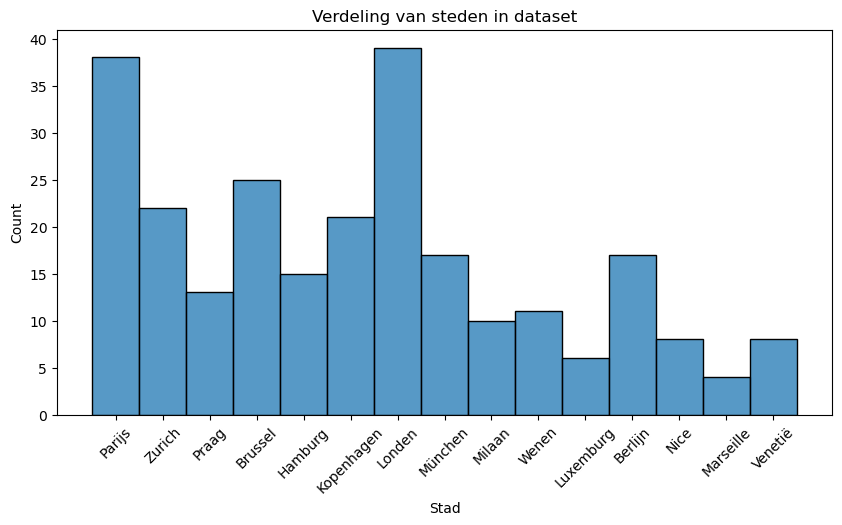

In [ ]:
# stedenlijst= ['Parijs', 'Brussel', 'Antwerpen', 'Praag', 'Londen', 'Hamburg', 'Frankfort', 'Wenen', 'Luxemburg', 'Milaan', 'Venetië', 'Berlijn', 'München', 'Luxemburg-stad', 'Zurich', 'Marseille', 'Nice', 'Kopenhagen', 'Geneve', 'Luxemburg-Stad']
# StedenHackaton= df['Stad'].isin(stedenlijst)
# # df[StedenHackaton].head()

# plt.figure(figsize=(10, 5))
# fig8 = sns.histplot(df.loc[StedenHackaton, 'Stad'], discrete=True)
# plt.xticks(rotation=45)
# plt.title("Verdeling van steden in dataset")
# plt.show()

In [176]:
stedenlijst= ['Parijs', 'Brussel', 'Antwerpen', 'Praag', 'Londen', 'Hamburg', 'Frankfort', 'Wenen', 'Luxemburg', 'Milaan', 'Venetië', 'Berlijn', 'München', 'Luxemburg-stad', 'Zurich', 'Marseille', 'Nice', 'Kopenhagen', 'Geneve', 'Luxemburg-Stad']
StedenHackaton= df['Stad'].isin(stedenlijst)
filtered_df = df.loc[StedenHackaton, 'Stad']

# Maak histogram met Plotly
fig8 = go.Figure()
fig8.add_trace(go.Histogram(x=filtered_df, marker=dict(color='royalblue')))

# Layout instellingen
fig8.update_layout(
    title="Verdeling van steden in dataset",
    xaxis_title="Steden",
    yaxis_title="Aantal",
    xaxis=dict(tickangle=45),
    bargap=0.1
)

fig8.show()

In [177]:
df.loc[StedenHackaton, 'Stad'].value_counts()

Stad
Londen        39
Parijs        38
Brussel       25
Zurich        22
Kopenhagen    21
Frankfort     18
München       17
Berlijn       17
Hamburg       15
Praag         13
Wenen         11
Milaan        10
Nice           8
Venetië        8
Luxemburg      6
Marseille      4
Name: count, dtype: int64

In [150]:
df.loc[StedenHackaton, 'Stad'].value_counts().sum()

254

In [151]:
df['Stad'].value_counts().sum()

1000

In [152]:
df.loc[StedenHackaton, 'Stad'].value_counts().sum()/df['Stad'].value_counts().sum()

0.254

In [153]:
df[StedenHackaton].head()

,lastUpdatedAt,actualLandingTime,aircraftRegistration,estimatedLandingTime,expectedTimeOnBelt,flightDirection,flightName,flightNumber,gate,pier,id,isOperationalFlight,mainFlight,prefixIATA,prefixICAO,airlineCode,scheduleDateTime,scheduleDate,scheduleTime,serviceType,terminal,schemaVersion,aircraftType.iataMain,aircraftType.iataSub,baggageClaim.belts,codeshares.codeshares,publicFlightState.flightStates,route.destinations,route.eu,route.visa,actualOffBlockTime,expectedSecurityFilter,checkinAllocations.checkinAllocations,expectedTimeBoarding,expectedTimeGateClosing,expectedTimeGateOpen,publicEstimatedOffBlockTime,transferPositions.transferPositions,Luchthaven,Stad,Land,Continent
6,2025-03-27T05:21:43.237+01:00,2025-03-27T05:08:13.000+01:00,OEIXF,2025-03-27T05:08:06.000+01:00,NaN,A,FX4235,4235,NaN,NaN,142009545247335414,True,FX4235,FX,FDX,219.0,2025-03-27T05:15:00.000+01:00,2025-03-27,05:15:00,F,NaN,4,73F,73K,NaN,NaN,[LND],CDG,S,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Charles de Gaulle,Parijs,Frankrijk,Europa
64,2025-03-27T07:02:29.003+01:00,NaN,PHAXA,NaN,NaN,D,KL1401,1401,D87,D,142009545895496449,True,KL1401,KL,KLM,100.0,2025-03-27T06:50:00.000+01:00,2025-03-27,06:50:00,J,1.0,4,32S,32Q,NaN,"[AF8373, DL9205, MU1555, VN3107]",[DEP],CDG,S,False,2025-03-27T06:51:51.000+01:00,VF1,"[{'endTime': '2025-03-27T06:10:00.000+01:00', ...",2025-03-27T06:20:00.000+01:00,2025-03-27T06:35:00.000+01:00,2025-03-27T05:50:00.000+01:00,NaN,NaN,Charles de Gaulle,Parijs,Frankrijk,Europa
65,2025-03-27T07:02:29.003+01:00,NaN,PHAXA,NaN,NaN,D,AF8373,8373,D87,D,142009544486834303,True,KL1401,AF,AFR,80.0,2025-03-27T06:50:00.000+01:00,2025-03-27,06:50:00,J,1.0,4,32S,32Q,NaN,"[AF8373, DL9205, MU1555, VN3107]",[DEP],CDG,S,False,2025-03-27T06:51:51.000+01:00,VF1,"[{'endTime': '2025-03-27T06:10:00.000+01:00', ...",2025-03-27T06:20:00.000+01:00,2025-03-27T06:35:00.000+01:00,2025-03-27T05:50:00.000+01:00,NaN,NaN,Charles de Gaulle,Parijs,Frankrijk,Europa
66,2025-03-27T07:02:29.003+01:00,NaN,PHAXA,NaN,NaN,D,DL9205,9205,D87,D,142009544925486031,True,KL1401,DL,DAL,58.0,2025-03-27T06:50:00.000+01:00,2025-03-27,06:50:00,J,1.0,4,32S,32Q,NaN,"[AF8373, DL9205, MU1555, VN3107]",[DEP],CDG,S,False,2025-03-27T06:51:51.000+01:00,VF1,"[{'endTime': '2025-03-27T06:10:00.000+01:00', ...",2025-03-27T06:20:00.000+01:00,2025-03-27T06:35:00.000+01:00,2025-03-27T05:50:00.000+01:00,NaN,NaN,Charles de Gaulle,Parijs,Frankrijk,Europa
67,2025-03-27T07:02:29.003+01:00,NaN,PHAXA,NaN,NaN,D,MU1555,1555,D87,D,142009546206610291,True,KL1401,MU,CES,1294.0,2025-03-27T06:50:00.000+01:00,2025-03-27,06:50:00,J,1.0,4,32S,32Q,NaN,"[AF8373, DL9205, MU1555, VN3107]",[DEP],CDG,S,False,2025-03-27T06:51:51.000+01:00,VF1,"[{'endTime': '2025-03-27T06:10:00.000+01:00', ...",2025-03-27T06:20:00.000+01:00,2025-03-27T06:35:00.000+01:00,2025-03-27T05:50:00.000+01:00,NaN,NaN,Charles de Gaulle,Parijs,Frankrijk,Europa


In [154]:
vliegtuigtypen= df.loc[StedenHackaton, ['aircraftType.iataMain', 'aircraftType.iataSub']].value_counts()

In [155]:
df4= pd.read_csv("ReisTijd.csv", sep=",")
df4.head()

,Unnamed: 0,Bestemming,Treintijd,Betrouwbaarheid_Tr,Vluchttijd,Betrouwbaarheid_Vl,Treintijd_min,Treintijd_uur,Vluchttijd_min,Vluchttijd_uur,TijdVerschil_min
0,0,Antwerpen,01:20,hoog,9:30,laag,80,1.333333,570,9.500000,-490
1,1,Berlijn,05:51,hoog,1:15,hoog,351,5.850000,75,1.250000,276
2,2,Brussel,01:56,hoog,0:40,hoog,116,1.933333,40,0.666667,76
3,3,Parijs,03:27,hoog,1:10,hoog,207,3.450000,70,1.166667,137
4,4,Praag,12:50,laag,1:20,hoog,770,12.833333,80,1.333333,690


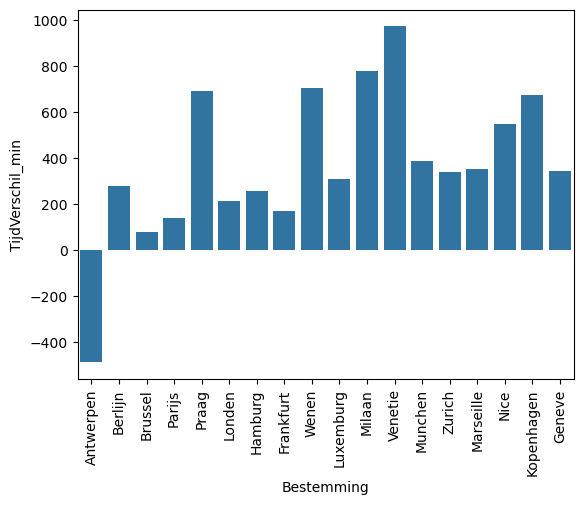

In [168]:
sns.barplot(data=df4, x="Bestemming", y="TijdVerschil_min",)
plt.xticks(rotation=90)
plt.show()

In [157]:
df['TypeVliegtuig']= df['aircraftType.iataMain']+ '-' + df['aircraftType.iataSub']
df.head()

,lastUpdatedAt,actualLandingTime,aircraftRegistration,estimatedLandingTime,expectedTimeOnBelt,flightDirection,flightName,flightNumber,gate,pier,id,isOperationalFlight,mainFlight,prefixIATA,prefixICAO,airlineCode,scheduleDateTime,scheduleDate,scheduleTime,serviceType,terminal,schemaVersion,aircraftType.iataMain,aircraftType.iataSub,baggageClaim.belts,codeshares.codeshares,publicFlightState.flightStates,route.destinations,route.eu,route.visa,actualOffBlockTime,expectedSecurityFilter,checkinAllocations.checkinAllocations,expectedTimeBoarding,expectedTimeGateClosing,expectedTimeGateOpen,publicEstimatedOffBlockTime,transferPositions.transferPositions,Luchthaven,Stad,Land,Continent,TypeVliegtuig
0,2025-03-27T01:39:47.186+01:00,2025-03-27T00:00:00.000+01:00,PHHXA,2025-03-26T23:59:52.000+01:00,2025-03-27T00:36:39.000+01:00,A,HV6888,6888,D61,D,142009545517434014,True,HV6888,HV,TRA,164.0,2025-03-27T00:15:00.000+01:00,2025-03-27,00:15:00,J,1.0,4,737,73H,[2],[KL2746],"[ARR, EXP]",KEF,S,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leif Eriksson Keflavík,Keflavík/Reykjavik,IJsland,Europa,737-73H
1,2025-03-27T01:39:47.186+01:00,2025-03-27T00:00:00.000+01:00,PHHXA,2025-03-26T23:59:52.000+01:00,2025-03-27T00:36:39.000+01:00,A,KL2746,2746,D61,D,142009545895606274,True,HV6888,KL,KLM,100.0,2025-03-27T00:15:00.000+01:00,2025-03-27,00:15:00,J,1.0,4,737,73H,[2],[KL2746],"[ARR, EXP]",KEF,S,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leif Eriksson Keflavík,Keflavík/Reykjavik,IJsland,Europa,737-73H
2,2024-10-16T15:17:08.055+02:00,NaN,NaN,NaN,NaN,A,HV6904,6904,NaN,NaN,142009545517436152,False,HV6904,HV,NaN,NaN,2025-03-27T00:35:00.000+01:00,2025-03-27,00:35:00,J,NaN,4,73H,73H,NaN,NaN,[SCH],DXB,N,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dubai International,Dubai,Verenigde Arabische Emiraten,Azië,73H-73H
3,2024-08-22T10:46:58.889+02:00,NaN,NaN,NaN,NaN,A,HV6308,6308,NaN,NaN,142009545517419732,False,HV6308,HV,NaN,NaN,2025-03-27T00:45:00.000+01:00,2025-03-27,00:45:00,J,NaN,4,32S,32Q,NaN,NaN,[SCH],BEY,N,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rafik Hariri,Beiroet,Libanon,Azië,32S-32Q
4,2025-03-27T05:39:39.790+01:00,2025-03-27T05:21:36.000+01:00,JA13KZ,2025-03-27T05:22:03.000+01:00,NaN,A,KZ004,4,NaN,NaN,142009544365967514,True,KZ004,KZ,NCA,131.0,2025-03-27T03:20:00.000+01:00,2025-03-27,03:20:00,F,NaN,4,74F,74N,NaN,NaN,"[LND, EXP]",NRT,N,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Narita,Narita,Japan,Azië,74F-74N


In [ ]:
# df.loc[SubStedenHackaton, 'Stad'].value_counts().sum()/df['Stad'].value_counts().sum()

0.063

In [184]:
Type_vliegtuig= {'EMJ-E90': 'Embraer-E90', '220-223': 'Airbus A220-300', '32S-32Q': 'Airbus A-321neo', 'EMJ-E7W':'Embraer-175', '73F-73K': 'Boeing 737-800', '737-73W': 'Boeing 737-700', '32S-320': 'Airbus A320-200' }
# , '330-320': 'Airbus A330-300'

In [179]:
df['ModelVliegtuig']= df['TypeVliegtuig'].map(Type_vliegtuig)
df.head()

,lastUpdatedAt,actualLandingTime,aircraftRegistration,estimatedLandingTime,expectedTimeOnBelt,flightDirection,flightName,flightNumber,gate,pier,id,isOperationalFlight,mainFlight,prefixIATA,prefixICAO,airlineCode,scheduleDateTime,scheduleDate,scheduleTime,serviceType,terminal,schemaVersion,aircraftType.iataMain,aircraftType.iataSub,baggageClaim.belts,codeshares.codeshares,publicFlightState.flightStates,route.destinations,route.eu,route.visa,actualOffBlockTime,expectedSecurityFilter,checkinAllocations.checkinAllocations,expectedTimeBoarding,expectedTimeGateClosing,expectedTimeGateOpen,publicEstimatedOffBlockTime,transferPositions.transferPositions,Luchthaven,Stad,Land,Continent,TypeVliegtuig,ModelVliegtuig
0,2025-03-27T01:39:47.186+01:00,2025-03-27T00:00:00.000+01:00,PHHXA,2025-03-26T23:59:52.000+01:00,2025-03-27T00:36:39.000+01:00,A,HV6888,6888,D61,D,142009545517434014,True,HV6888,HV,TRA,164.0,2025-03-27T00:15:00.000+01:00,2025-03-27,00:15:00,J,1.0,4,737,73H,[2],[KL2746],"[ARR, EXP]",KEF,S,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leif Eriksson Keflavík,Keflavík/Reykjavik,IJsland,Europa,737-73H,NaN
1,2025-03-27T01:39:47.186+01:00,2025-03-27T00:00:00.000+01:00,PHHXA,2025-03-26T23:59:52.000+01:00,2025-03-27T00:36:39.000+01:00,A,KL2746,2746,D61,D,142009545895606274,True,HV6888,KL,KLM,100.0,2025-03-27T00:15:00.000+01:00,2025-03-27,00:15:00,J,1.0,4,737,73H,[2],[KL2746],"[ARR, EXP]",KEF,S,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leif Eriksson Keflavík,Keflavík/Reykjavik,IJsland,Europa,737-73H,NaN
2,2024-10-16T15:17:08.055+02:00,NaN,NaN,NaN,NaN,A,HV6904,6904,NaN,NaN,142009545517436152,False,HV6904,HV,NaN,NaN,2025-03-27T00:35:00.000+01:00,2025-03-27,00:35:00,J,NaN,4,73H,73H,NaN,NaN,[SCH],DXB,N,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dubai International,Dubai,Verenigde Arabische Emiraten,Azië,73H-73H,NaN
3,2024-08-22T10:46:58.889+02:00,NaN,NaN,NaN,NaN,A,HV6308,6308,NaN,NaN,142009545517419732,False,HV6308,HV,NaN,NaN,2025-03-27T00:45:00.000+01:00,2025-03-27,00:45:00,J,NaN,4,32S,32Q,NaN,NaN,[SCH],BEY,N,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rafik Hariri,Beiroet,Libanon,Azië,32S-32Q,Airbus A-321neo
4,2025-03-27T05:39:39.790+01:00,2025-03-27T05:21:36.000+01:00,JA13KZ,2025-03-27T05:22:03.000+01:00,NaN,A,KZ004,4,NaN,NaN,142009544365967514,True,KZ004,KZ,NCA,131.0,2025-03-27T03:20:00.000+01:00,2025-03-27,03:20:00,F,NaN,4,74F,74N,NaN,NaN,"[LND, EXP]",NRT,N,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Narita,Narita,Japan,Azië,74F-74N,NaN


In [162]:
df2= pd.read_csv("Hackaton2.csv")

In [180]:
stedenlijst2= ['Antwerpen', 'Brussel', 'Frankfort', 'Parijs']
SubStedenHackaton= df['Stad'].isin(stedenlijst2)

In [181]:
Subvliegtuigtypen= df.loc[SubStedenHackaton, ['ModelVliegtuig']].value_counts()
print(Subvliegtuigtypen)

ModelVliegtuig 
Embraer-175        25
Airbus A320-200    22
Embraer-E90        13
Airbus A220-300     7
Boeing 737-800      7
Airbus A-321neo     5
Name: count, dtype: int64


ValueError: 'label' must be of length 'x'

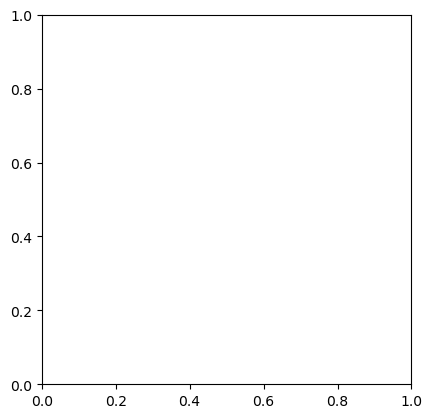

In [185]:
plt.pie(x=Subvliegtuigtypen, labels=Type_vliegtuig)
plt.show()

In [165]:
fig10= px.pie(df2, names='ModelVliegtuig', title="Soorten Vliegtuig")
fig10.show()